In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
port_path = "Prueba.xlsx"
market = pd.read_excel(port_path, index_col=0)

In [3]:
market.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


**El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio
completo que maximice tu utilidad
.
Considera una tasa libre de riesgo de 5.0%
,
un premio
por riesgo de mercado de 10.0%
y un nivel de aversión al riesgo A=3**

**Escogemos 7 acciones**

In [4]:
random.seed(314)
equities=random.sample(list(market.columns),7)
equities

['ALSEA* MF Equity',
 'GMEXICOB MF Equity',
 'LABB MF Equity',
 'AMXL MF Equity',
 'KIMBERA MF Equity',
 'GENTERA* MF Equity',
 'GCARSOA1 MF Equity']

In [5]:
eqs=market[equities]
eqs.head()

,ALSEA* MF Equity,GMEXICOB MF Equity,LABB MF Equity,AMXL MF Equity,KIMBERA MF Equity,GENTERA* MF Equity,GCARSOA1 MF Equity
DATE,,,,,,,
2016-01-01,59.85,36.79,13.85,12.12,40.37,33.35,70.98
2016-01-04,58.93,35.71,14.41,12.03,39.16,31.80,69.83
2016-01-05,59.41,36.45,13.77,11.97,38.89,32.16,70.70
2016-01-06,59.19,35.57,13.65,11.74,39.13,31.89,70.47
2016-01-07,56.93,35.01,13.25,11.34,39.16,30.59,68.15


# 1.Rendimiento esperado diario y anual bajo los siguientes modelos:

a.Modelo de rendimiento promedio constante


In [6]:
rets = eqs.pct_change().dropna(axis=0)
rets.columns = [col.replace(" MF Equity", "") for col in rets.columns]
rets.head()

,ALSEA*,GMEXICOB,LABB,AMXL,KIMBERA,GENTERA*,GCARSOA1
DATE,,,,,,,
2016-01-04,-0.015372,-0.029356,0.040433,-0.007426,-0.029973,-0.046477,-0.016202
2016-01-05,0.008145,0.020722,-0.044414,-0.004988,-0.006895,0.011321,0.012459
2016-01-06,-0.003703,-0.024143,-0.008715,-0.019215,0.006171,-0.008396,-0.003253
2016-01-07,-0.038182,-0.015744,-0.029304,-0.034072,0.000767,-0.040765,-0.032922
2016-01-08,-0.003337,-0.024279,-0.015094,-0.037037,-0.013023,-0.002288,-0.000587


In [7]:
rend_d=rets.mean() #diario
rend_d

ALSEA*     -0.000019
GMEXICOB    0.000531
LABB        0.000521
AMXL        0.000348
KIMBERA     0.000066
GENTERA*   -0.000284
GCARSOA1    0.000224
dtype: float64

In [8]:
rend_a=rets.mean()*252 #anual
rend_a

ALSEA*     -0.004718
GMEXICOB    0.133839
LABB        0.131383
AMXL        0.087740
KIMBERA     0.016722
GENTERA*   -0.071630
GCARSOA1    0.056460
dtype: float64

In [9]:
#calculamos pesos aleatorios...
weights = np.random.random(7)
weights /= sum(weights)
weights

array([0.24088922, 0.26719461, 0.11003278, 0.09544069, 0.22148783,
       0.00581472, 0.05914015])

In [10]:
#Rendimiento esperado promedio cte...
E_p = (rend_d @ weights) #diario
E_p

0.0002542901094701493

In [11]:
E_pa = (rend_d @ weights)*252 #anual
E_pa

0.06408110758647763

In [12]:
S_p = np.sqrt(weights.T @ (rets.cov()) @ weights)
S_p

0.010321904803262918

**b.Modelo CAPM**

i.¿Cuál es la beta de cada acción?

ii.Clasifica las acciones en defensivas y agresivas

**Usaremos mexbol como el mercado para calcular las $\beta's$**

$\beta_{p}=\frac{\operatorname{Cov}\left(r_{p}, r_{b}\right)}{\operatorname{Var}\left(r_{b}\right)}$

In [13]:
rends=eqs.copy()
rends["MEXBOL INDEX"]=market["MEXBOL INDEX"]
rends=rends.pct_change().dropna(axis=0)
rends.head()

,ALSEA* MF Equity,GMEXICOB MF Equity,LABB MF Equity,AMXL MF Equity,KIMBERA MF Equity,GENTERA* MF Equity,GCARSOA1 MF Equity,MEXBOL INDEX
DATE,,,,,,,,
2016-01-04,-0.015372,-0.029356,0.040433,-0.007426,-0.029973,-0.046477,-0.016202,-0.020099
2016-01-05,0.008145,0.020722,-0.044414,-0.004988,-0.006895,0.011321,0.012459,-0.001710
2016-01-06,-0.003703,-0.024143,-0.008715,-0.019215,0.006171,-0.008396,-0.003253,-0.008337
2016-01-07,-0.038182,-0.015744,-0.029304,-0.034072,0.000767,-0.040765,-0.032922,-0.024696
2016-01-08,-0.003337,-0.024279,-0.015094,-0.037037,-0.013023,-0.002288,-0.000587,-0.009744


In [14]:
#Calculamos las betas...
betas=((rends.cov())/(rends.var()))['MEXBOL INDEX'].head(7)
betas

ALSEA* MF Equity      0.822097
GMEXICOB MF Equity    1.121967
LABB MF Equity        0.750539
AMXL MF Equity        1.143297
KIMBERA MF Equity     0.818112
GENTERA* MF Equity    1.007168
GCARSOA1 MF Equity    1.084677
Name: MEXBOL INDEX, dtype: float64

In [15]:
#clasificamos acciones
bts=pd.DataFrame(betas)
bts.columns=['beta']
bts['tipo_acción']=bts['beta'].apply(lambda x: "defensiva" if x<=1 else 'ofensiva')
bts

,beta,tipo_acción
ALSEA* MF Equity,0.822097,defensiva
GMEXICOB MF Equity,1.121967,ofensiva
LABB MF Equity,0.750539,defensiva
AMXL MF Equity,1.143297,ofensiva
KIMBERA MF Equity,0.818112,defensiva
GENTERA* MF Equity,1.007168,ofensiva
GCARSOA1 MF Equity,1.084677,ofensiva


# 2. Matriz varianza-covarianza

In [16]:
vcov=rets.cov() #diaria
vcov

,ALSEA*,GMEXICOB,LABB,AMXL,KIMBERA,GENTERA*,GCARSOA1
ALSEA*,0.000235,0.000045,0.000059,0.000046,0.000071,0.000084,0.000079
GMEXICOB,0.000045,0.000325,0.000055,0.000064,0.000055,0.000062,0.000105
LABB,0.000059,0.000055,0.000463,0.000044,0.000070,0.000075,0.000083
AMXL,0.000046,0.000064,0.000044,0.000229,0.000051,0.000050,0.000068
KIMBERA,0.000071,0.000055,0.000070,0.000051,0.000245,0.000088,0.000087
GENTERA*,0.000084,0.000062,0.000075,0.000050,0.000088,0.000425,0.000111
GCARSOA1,0.000079,0.000105,0.000083,0.000068,0.000087,0.000111,0.000361


In [17]:
vcov_a=rets.cov()*252 #anual
vcov_a

,ALSEA*,GMEXICOB,LABB,AMXL,KIMBERA,GENTERA*,GCARSOA1
ALSEA*,0.059311,0.011371,0.014907,0.011551,0.017879,0.021284,0.019921
GMEXICOB,0.011371,0.081936,0.013816,0.016184,0.013779,0.015503,0.026386
LABB,0.014907,0.013816,0.116668,0.011076,0.017742,0.018866,0.020939
AMXL,0.011551,0.016184,0.011076,0.057781,0.012913,0.012716,0.017199
KIMBERA,0.017879,0.013779,0.017742,0.012913,0.061756,0.022226,0.021810
GENTERA*,0.021284,0.015503,0.018866,0.012716,0.022226,0.107196,0.028079
GCARSOA1,0.019921,0.026386,0.020939,0.017199,0.021810,0.028079,0.090924


**Utilizando los rendimientos esperados bajo el modelo CAPM, construye:**

# 3.Frontera de carteras de mínima varianza y frontera eficiente / graficar


In [18]:
#rendimientos bajo CAPM #diarios
#dado que suponemos las tasas libre de riesgo y premio anuales las hacemos diarias
rf=0.05/252
premio=.1/252
rcap=rf+betas*premio 
rcap #diario

ALSEA* MF Equity      0.000525
GMEXICOB MF Equity    0.000644
LABB MF Equity        0.000496
AMXL MF Equity        0.000652
KIMBERA MF Equity     0.000523
GENTERA* MF Equity    0.000598
GCARSOA1 MF Equity    0.000629
Name: MEXBOL INDEX, dtype: float64

In [19]:
rcap_a=rcap*252 #anual
rcap_a

ALSEA* MF Equity      0.132210
GMEXICOB MF Equity    0.162197
LABB MF Equity        0.125054
AMXL MF Equity        0.164330
KIMBERA MF Equity     0.131811
GENTERA* MF Equity    0.150717
GCARSOA1 MF Equity    0.158468
Name: MEXBOL INDEX, dtype: float64

In [20]:
#diarios
def port_rend(weights, r):
    E_p = (rcap @ weights)
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov()) @ weights)
    return S_p

#anuales
def port_rend_a(weights, r):
    E_p = (rcap_a @ weights)
    return E_p

def port_vol_a(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov()*252) @ weights)
    return S_p

In [21]:
weights_sim = np.random.random((5000, 7))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend_a, 1, weights_sim, r=rets)
vol_sim = np.apply_along_axis(port_vol_a, 1, weights_sim, r=rets)

Text(0.5, 1.0, 'Mínima varianza anual')

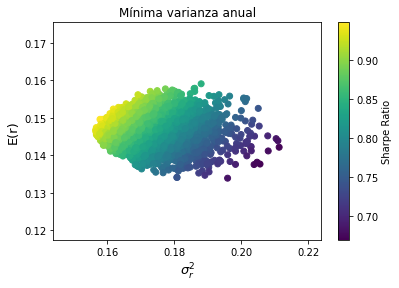

In [22]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);
plt.title('Mínima varianza anual')

**Frontera eficiente**

In [23]:
from scipy.optimize import minimize

In [24]:
N, M = rets.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol_a, w0, constraints=constraints, args=rets)
port0

     fun: 0.15616423393653073
     jac: array([0.15631711, 0.15658047, 0.15607796, 0.15608172, 0.15605413,
       0.15545655, 0.15622459])
 message: 'Optimization terminated successfully.'
    nfev: 101
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.21738308, 0.14444161, 0.09378242, 0.25121994, 0.17974844,
       0.06787354, 0.04555096])

In [25]:
wp0 = port0.x
port_rend_a(wp0, rets), port_vol_a(wp0, rets)

(0.1463197480324147, 0.15616423393653073)

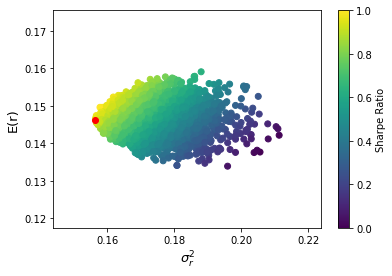

In [26]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol_a(wp0, rets), port_rend_a(wp0, rets),color='r')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [27]:
def sum_weights(weights):
    return weights.sum() -1 # == 0

def rend_esperado(w, E):
    return port_rend_a(w, rets) - E # == 0

In [28]:
r_min = port_rend_a(wp0, rets)
r_max = rcap_a.max()

rend_max = np.linspace(r_min, r_max)

In [29]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol_a, w0, constraints=constraints, args=rets)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

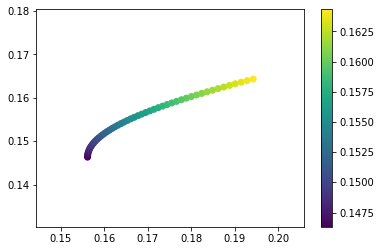

In [30]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend_a(w, rets))
    v_opt.append(port_vol_a(w, rets))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

# 4.Encuentra el portafolio riesgoso óptimo
(maximiza el coeficiente de Sharpe)



In [31]:
rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend_a(weights, rets) - rf) / port_vol_a(weights, rets)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

bounds=[(0,None),(0,None),(0,None),(0,None),(0,None),(0,None),(0,None)]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [32]:
w_sharpe = f_sharpe.x

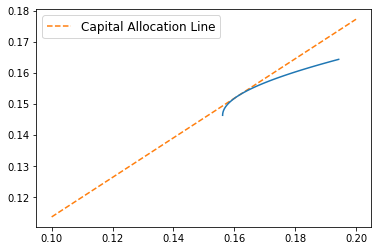

In [33]:
e_sharpe = port_rend_a(w_sharpe, rets)
vol_sharpe = port_vol_a(w_sharpe, rets)

sigma_c =  np.linspace(0.1, 0.2)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [34]:
e_sharpe

0.15246347484113937

# 5.Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [44]:
#wp0

In [43]:
#porcentajes a invertir..
pesos=pd.DataFrame(w_sharpe,columns=['Porcentajes_inv'])
pesos.index=rets.columns
pesos['libre_inv']=wp0
pesos

,Porcentajes_inv,libre_inv
ALSEA*,0.144193,0.217383
GMEXICOB,0.188936,0.144442
LABB,0.043560,0.093782
AMXL,0.341537,0.251220
KIMBERA,0.104257,0.179748
GENTERA*,0.089019,0.067874
GCARSOA1,0.088497,0.045551


In [36]:
vol_sharpe

0.1610597446998209

In [37]:
A=3
y_star=(e_sharpe-rf)/(A*vol_sharpe**2)
y_star

1.3166605173817092

In [38]:
#rend pARA NUESRO PRTAFOLIO A NIVEL A DE RIESGO
E_util=rf+y_star*(e_sharpe-rf)

In [39]:
V_util=y_star*vol_sharpe

In [40]:
#esperanza y varianza de la utilidad
print(E_util,V_util)

0.18490961179706228 0.21206100678583217


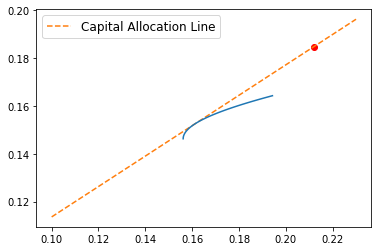

In [41]:
e_sharpe = port_rend_a(w_sharpe, rets)
vol_sharpe = port_vol_a(w_sharpe, rets)

sigma_c =  np.linspace(0.1, 0.23)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.scatter(V_util, E_util,c="r")
plt.legend(fontsize=12)

# 6. ¿En qué escenarios ocuparías una red neuronal?
**R= La usaría cuando tengo un fenómeno muy complejo de modelor ejemplo uanserie de tiempo que no muestra estacionalidades o que ajusta muy mal con los modelos tradicionales, si tuviera que modelar imagenes para detectar rostros millones de imágenes, en algún problema donde me importe más el resultado que la interpretación**

# 7. ¿En qué escenarios no ocuparías una red neuronal?
**R=Cuando me importa mucha la interpretabilidad, cuando el fenómeno se puede modelar, con buenos resultados,  con modelos simples de ML como regresiones o árboles, cuando tengo pocos datos ya que el performance de las redes mejora con la cantidad de datos.**

# 8. Menciona tres funciones de activación para una red neuronal feed-forward
**R=ReLu,Sigmoide,tanh,Softmax**

# 9. ¿Qué es el método de backpropagation?

**R=Es el método mediante el cual al entrenar una red neuronal, minimiza el error o costo como su nombre lo dice el proceso va ajustando los pesos de la red, en cada iteración, de tal modo que se alcance el error deseado todo esto partiendo del output o resultado de la red hacia atrás, matemáticamente es actualizar los pesos de toda la red por capa restando  acada peso de cada capa el gradiente o derivada corrrespondiente.**

# 10. ¿En qué difiere una red neuronal feed-forward de una red neuronal convolucional?

**R=Una CNN no debe ser necesariamente fully conected(todos los layers conectados) y tiene 3 dimensiones, a diferencia de la red feed-forward, base(width), altura(Height) y profundidad(depth)**